# Week 6-SVM-pulsar_data

## Name:Anisha Jani
## Reg no.: 220968033
## Roll no.: 11

## 1. Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset  

In [22]:
df=pd.read_csv('pulsar_data.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## 3. Explore the data to gain insights about the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [24]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [25]:
df.iloc[:,-1].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [26]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [27]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [28]:
def remove_leading_spaces(columns):
    return [column.strip() for column in columns]

col = df.columns
col = remove_leading_spaces(col)
df.columns=col

In [29]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [30]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [31]:
df.columns = ['Mean_Integrated_Profile',
              'Std_Dev_Integrated_Profile',
              'Excess_Kurtosis_Integrated_Profile',
              'Skewness_Integrated_Profile',
              'Mean_DM_SNR_Curve',
              'Std_Dev_DM_SNR_Curve',
              'Excess_Kurtosis_DM_SNR_Curve',
              'Skewness_DM_SNR_Curve',
              'Target_Class']
df

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve,Target_Class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

Mean_Integrated_Profile               0
Std_Dev_Integrated_Profile            0
Excess_Kurtosis_Integrated_Profile    0
Skewness_Integrated_Profile           0
Mean_DM_SNR_Curve                     0
Std_Dev_DM_SNR_Curve                  0
Excess_Kurtosis_DM_SNR_Curve          0
Skewness_DM_SNR_Curve                 0
Target_Class                          0
dtype: int64

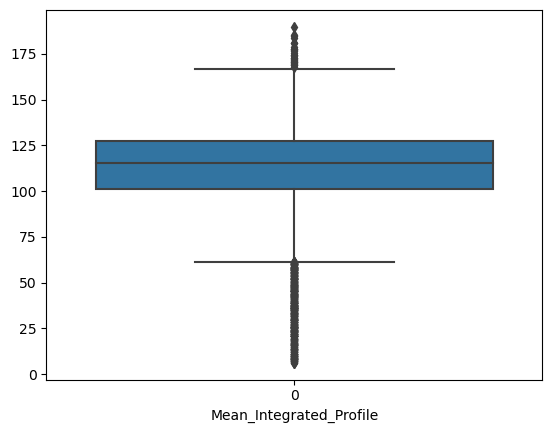

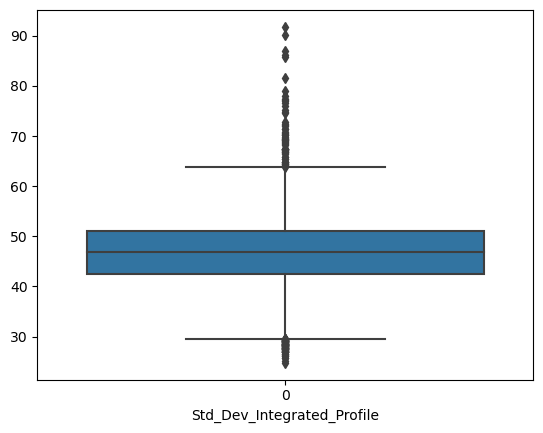

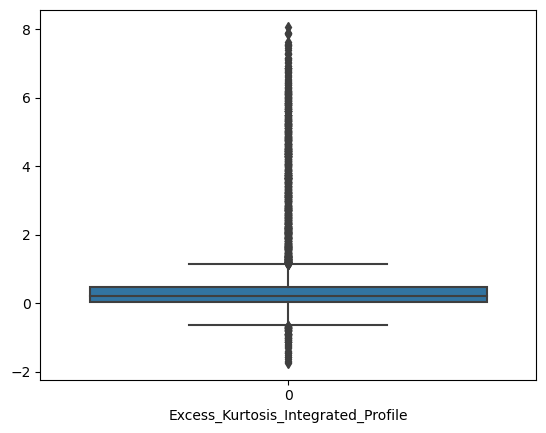

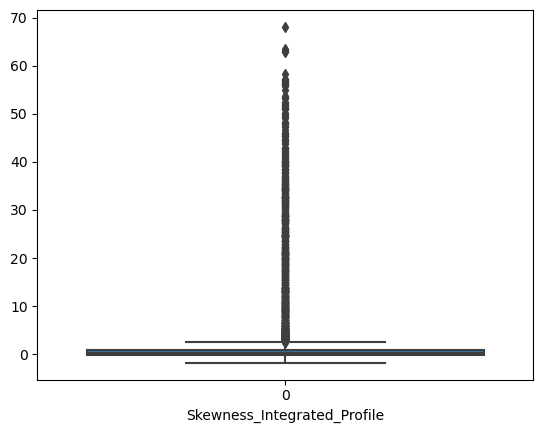

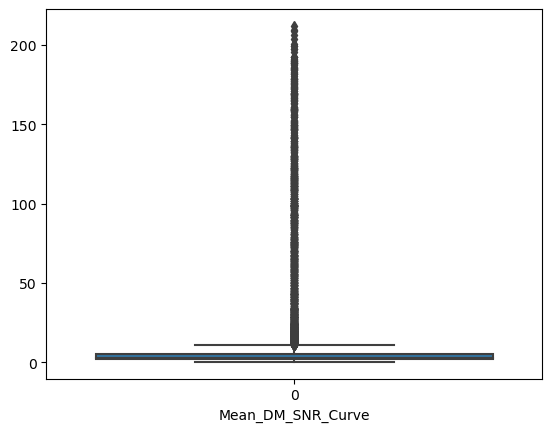

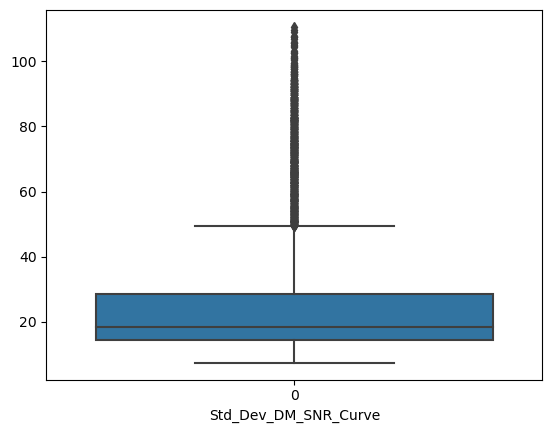

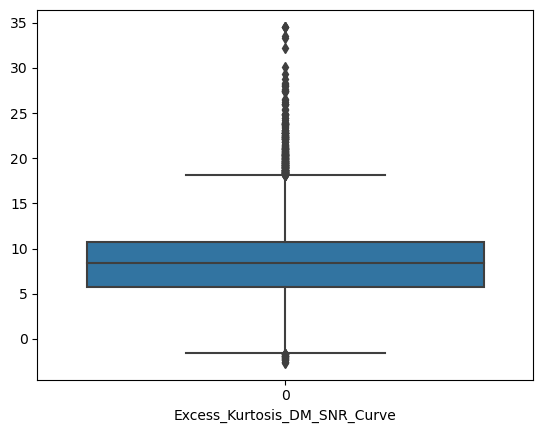

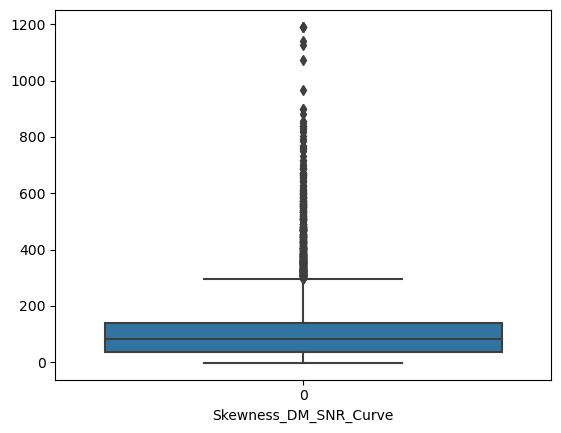

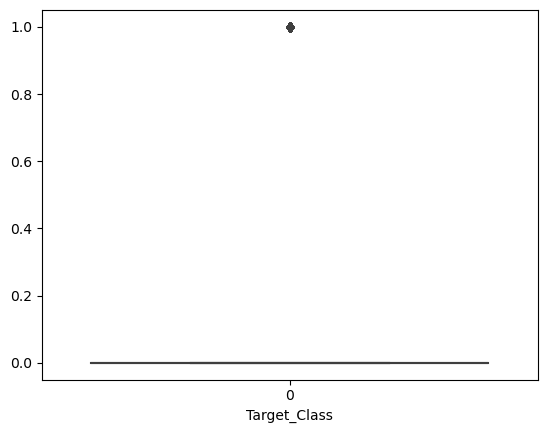

In [34]:
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    plt.show()

In [36]:
def remove_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + (1.5 * iqr)
        ll = q1 - (1.5 * iqr)
        med = data[col].median()
        data[col] = data[col].apply(lambda x: med if (x > ul or x < ll) else x)
    return data
X=remove_outliers(X)

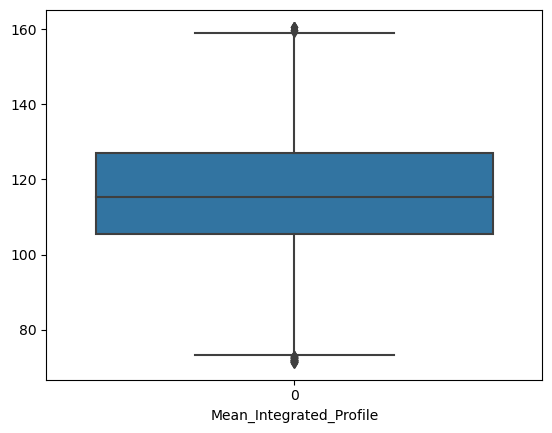

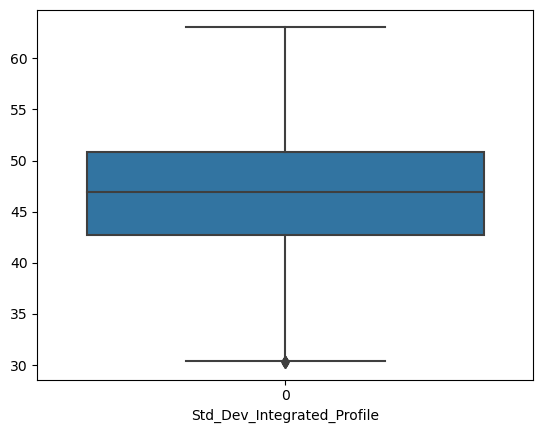

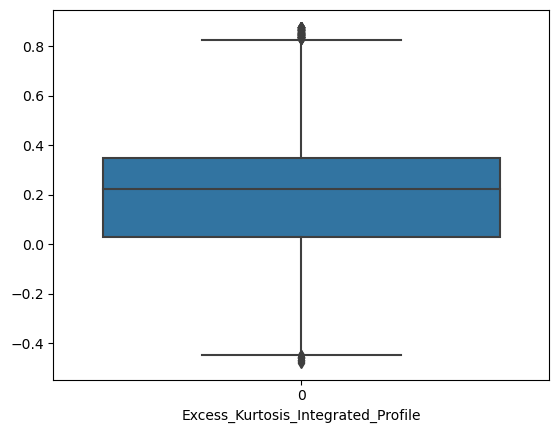

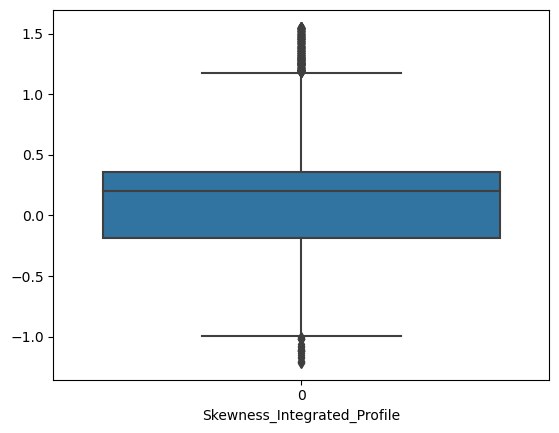

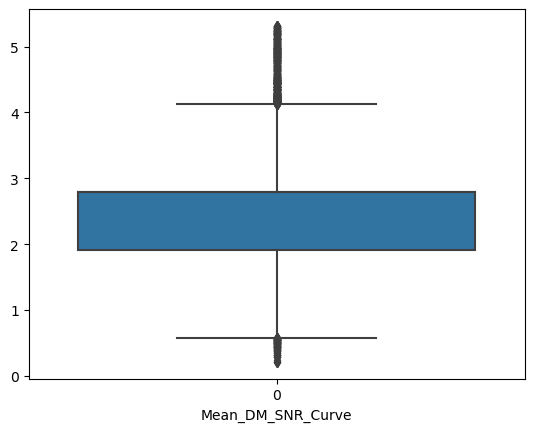

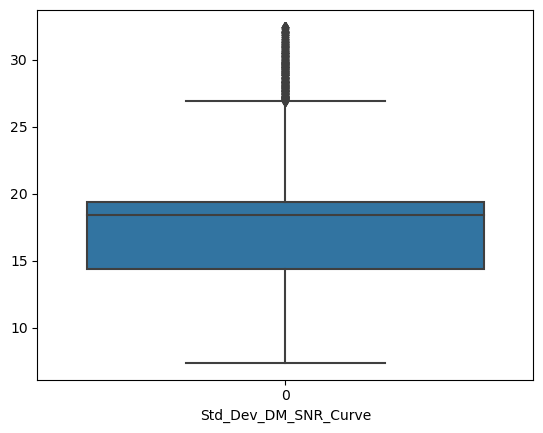

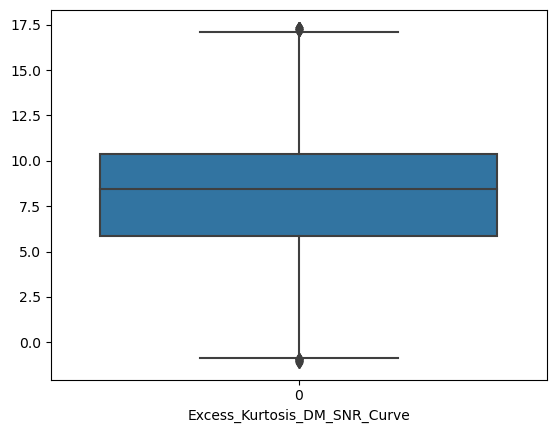

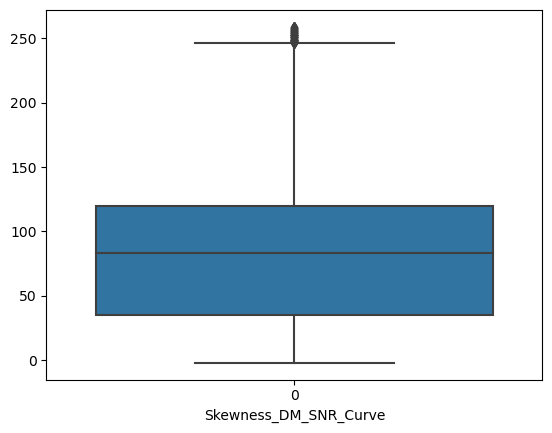

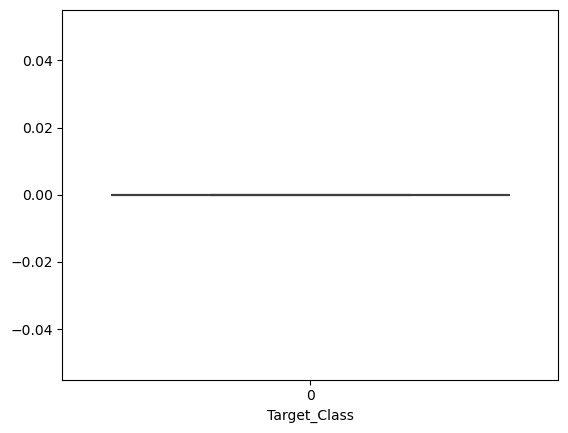

In [37]:
for col in X.columns:
    sns.boxplot(data=X[col])
    plt.xlabel(col)
    plt.show()

## 4. Check the distribution of variables

<Axes: >

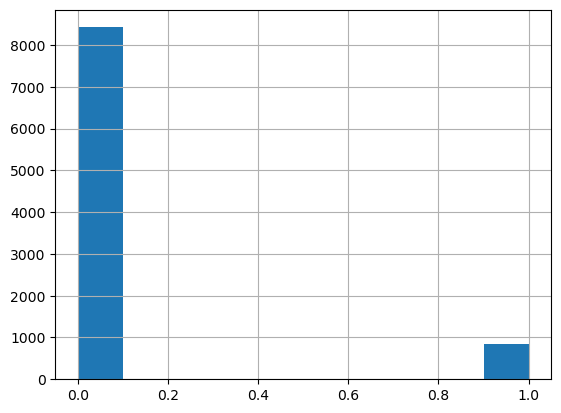

In [38]:
df["Target_Class"].hist()

In [39]:
df["Target_Class"].value_counts()

Target_Class
0.0    8423
1.0     850
Name: count, dtype: int64

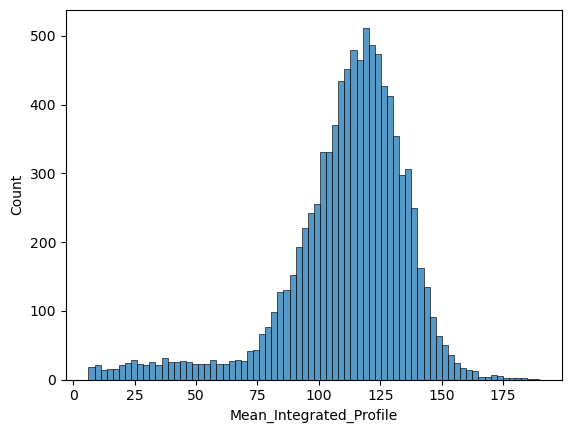

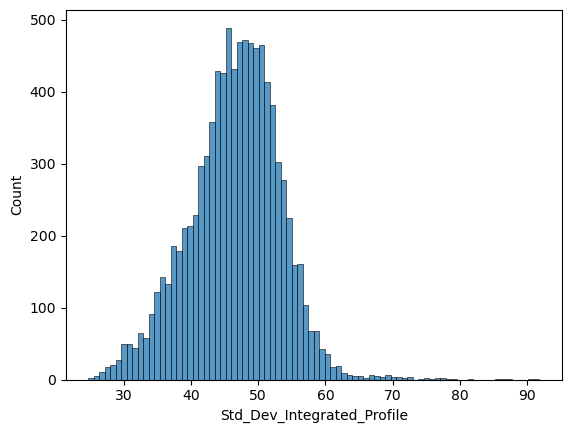

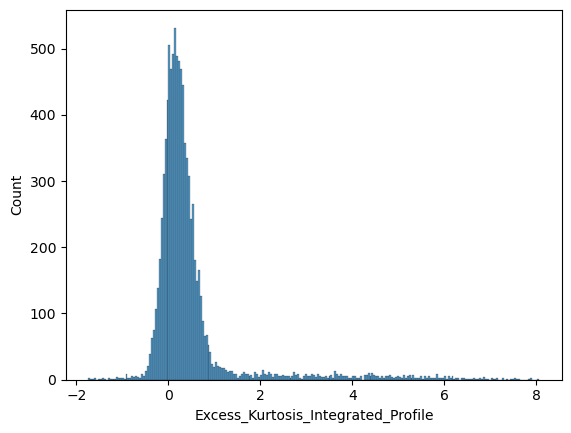

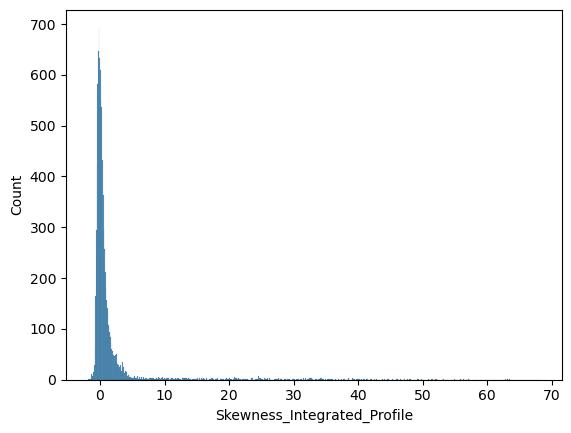

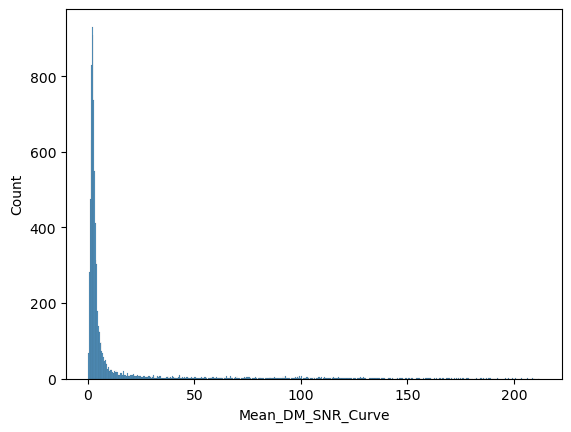

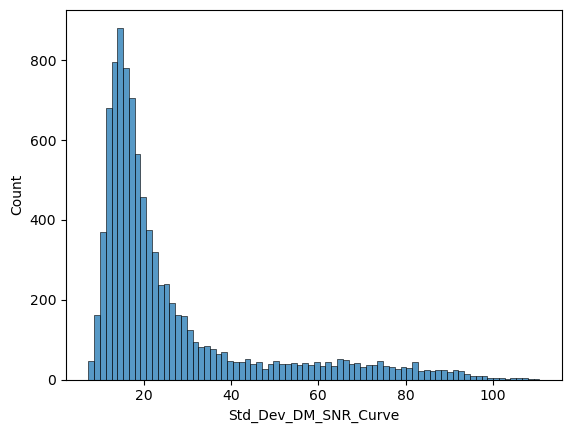

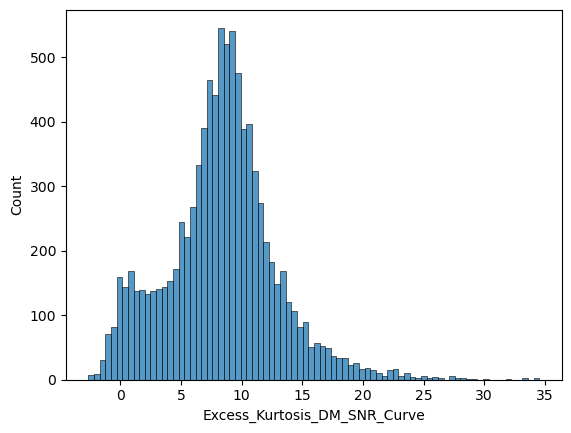

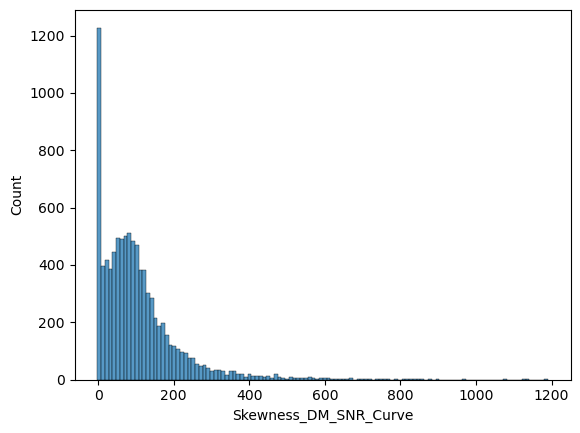

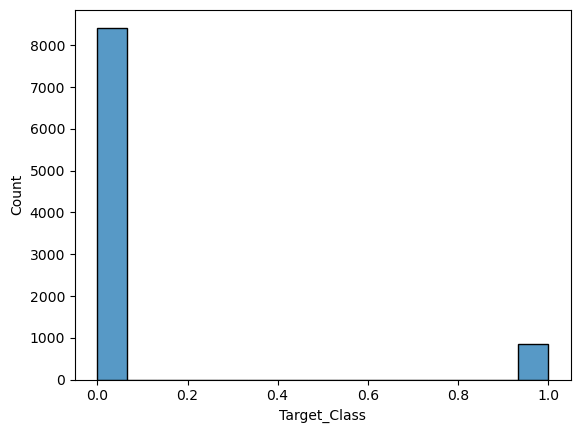

In [40]:
for col in df.columns:
    sns.histplot(data=df[col])
    plt.xlabel(col)
    plt.show()

## 5. Split data into separate training and test set 

In [41]:
X=df.iloc[:,:-1]
X

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578
...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [42]:
y=df.iloc[:,-1]
y

0        0.0
1        0.0
2        0.0
4        0.0
7        0.0
        ... 
12522    0.0
12523    0.0
12525    0.0
12526    0.0
12527    0.0
Name: Target_Class, Length: 9273, dtype: float64

In [43]:
y.value_counts()

Target_Class
0.0    8423
1.0     850
Name: count, dtype: int64

## 6. Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
#standard scaling is feature scaling
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    for col in df.columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))#scaling should be done to the col values
    return df

X = scale(X)
X

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
0,0.390208,0.274138,-0.097154,-0.286951,-0.321398,-0.405724,-0.192994,-0.375589
1,-1.330153,-1.524637,0.217862,0.254214,-0.347241,-0.448114,0.238857,-0.028295
2,0.757336,0.990345,-0.323162,-0.332141,-0.335696,-0.202916,0.039658,-0.293563
4,-1.025075,-1.533176,0.322535,0.235985,-0.334123,-0.292190,0.016941,-0.272670
7,-0.067257,1.386010,0.079880,-0.275909,-0.333870,-0.349579,0.245149,-0.077743
...,...,...,...,...,...,...,...,...
12522,0.533166,0.600605,-0.229655,-0.330497,-0.349151,-0.633413,0.197433,0.106552
12523,0.513091,0.982900,-0.459308,-0.373307,-0.186423,0.152516,-0.834468,-0.777159
12525,0.190675,-0.486688,0.171702,-0.215962,-0.401484,-0.752227,1.918223,1.908463
12526,0.955044,0.504309,-0.531685,-0.320924,-0.298195,-0.246979,-0.204309,-0.401710


In [46]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=5)#use this so that wont take all 0s only

In [48]:
X_train

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
838,0.569970,1.669769,-0.503837,-0.397207,-0.338056,-0.454953,0.360428,0.085421
6085,1.129026,1.449150,-0.759361,-0.360075,1.843850,2.398515,-1.787863,-0.995359
6628,0.962952,0.883206,-0.283910,-0.353191,-0.357438,-0.587294,0.301010,0.089660
6755,0.775890,0.163658,-0.418954,-0.300912,-0.304937,-0.030174,-0.178771,-0.443725
11233,-0.181015,0.212435,-0.132184,-0.264918,-0.346314,-0.478416,0.342401,0.085103
...,...,...,...,...,...,...,...,...
9837,0.571795,1.749165,-0.400288,-0.381947,-0.349207,-0.462710,0.144014,-0.129499
4087,-0.215994,1.130986,-0.229796,-0.329476,-0.394433,-0.816743,1.745035,2.116494
5516,-2.977210,-1.840009,3.790812,3.475838,0.911216,2.169478,-1.451814,-0.960562
3014,0.934056,-0.300460,-0.402461,-0.250438,-0.301088,-0.369422,-0.314151,-0.445644


In [49]:
X_test

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
1728,0.194629,0.393441,-0.199511,-0.199583,-0.413254,-0.927669,3.996398,6.290036
6330,0.335458,0.455735,-0.332718,-0.293351,-0.302914,-0.263369,-0.258648,-0.447087
6423,0.372262,1.039992,-0.358454,-0.347224,0.009958,0.839858,-1.107928,-0.887727
11127,0.701065,2.968111,-0.524525,-0.439119,-0.406821,-0.910278,3.379275,5.183989
8712,-2.757298,-1.579481,3.355275,2.878774,3.342734,3.411607,-1.772918,-0.991327
...,...,...,...,...,...,...,...,...
10231,-0.076078,-1.130921,0.216158,-0.015215,-0.332578,-0.189809,0.074183,-0.260294
2928,0.366787,0.608156,-0.269378,-0.303111,-0.262042,-0.005603,-0.475101,-0.598885
9528,-0.196832,-0.644593,-0.041172,-0.211541,-0.288111,0.019566,-0.358183,-0.559761
4253,0.582441,1.818536,-0.572736,-0.382023,-0.373141,-0.439089,0.768717,0.368339


In [50]:
y_train

838      0.0
6085     0.0
6628     0.0
6755     0.0
11233    0.0
        ... 
9837     0.0
4087     0.0
5516     1.0
3014     0.0
3921     0.0
Name: Target_Class, Length: 7418, dtype: float64

In [51]:
y_test

1728     0.0
6330     0.0
6423     0.0
11127    0.0
8712     1.0
        ... 
10231    0.0
2928     0.0
9528     0.0
4253     0.0
604      0.0
Name: Target_Class, Length: 1855, dtype: float64

## Run SVM MODELS
7. Run SVM with default hyperparameters 

    Run SVM with rbf kernel and C=1.0 and gamma=auto 
    
    Run SVM with rbf kernel and C=100.0
    
    Run SVM with rbf kernel and C=1000.0
    
8. Run SVM with linear kernel

    Run SVM with linear kernel and C=1.0
    
    Run SVM with linear kernel and C=100.0
    
    Run SVM with linear kernel and C=1000.0
    
9. Run SVM with polynomial kernel

    Run SVM with polynomial kernel and C=1.0
    
    Run SVM with polynomial kernel and C=100.0
    
    Run SVM with polynomial kernel and C=1000.0
    
10. Run SVM with sigmoid kernel 

    Run SVM with sigmoid kernel and C=1.0
    
    Run SVM with sigmoid kernel and C=100.0
    
    Run SVM with sigmoid kernel and C=1000.0
    
11. Compare the train-set and test-set accuracy

12. Check for overfitting and underfitting

13. visualize confusion matrix with seaborn heatmap

14. Generate classification report 

15. Evaluate classification accuracy

16. Evaluate Classification error


In [52]:
def running_svm(model,c):
    cl=svm.SVC(kernel=model,C=c)
    return cl

In [53]:
svm_default_1=running_svm("rbf",1.0)
svm_default_2=running_svm("rbf",100.0)
svm_default_3=running_svm("rbf",1000.0)

In [54]:
svm_linear_1=running_svm("linear",1.0)
svm_linear_2=running_svm("linear",100.0)
svm_linear_3=running_svm("linear",1000.0)

In [55]:
svm_poly_1=running_svm("poly",1.0)
svm_poly_2=running_svm("poly",100.0)
svm_poly_3=running_svm("poly",1000.0)

In [56]:
svm_sigmoid_1=running_svm("poly",1.0)
svm_sigmoid_2=running_svm("poly",100.0)
svm_sigmoid_3=running_svm("poly",1000.0)

In [57]:
models = {
    'svm_rbf_C1': svm_default_1,
    'svm_rbf_C100': svm_default_2,
    'svm_rbf_C1000': svm_default_3,
    'svm_linear_C1': svm_linear_1,
    'svm_linear_C100': svm_linear_2,
    'svm_linear_C1000': svm_linear_3,
    'svm_poly_C1': svm_poly_1,
    'svm_poly_C100': svm_poly_2,
    'svm_poly_C1000': svm_poly_3,
    'svm_sigmoid_C1': svm_sigmoid_1,
    'svm_sigmoid_C100': svm_sigmoid_2,
    'svm_sigmoid_C1000': svm_sigmoid_3
}

In [58]:
def fit_test_svm(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        y_train_pred=mod.predict(X_train)
        print("Model name",model)
        print("Test set metrics")
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Precision:",precision_score(y_test, y_pred))
        print("Recall:",recall_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Train set metrics")
        print("Accuracy:",accuracy_score(y_train,y_train_pred))
        print("Precision:",precision_score(y_train,y_train_pred))
        print("Recall:",recall_score(y_train,y_train_pred))
        print("Classification report is")
        print(classification_report(y_train,y_train_pred))
        print("confusion matrix is")
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True)
        plt.show()

Model name svm_rbf_C1
Test set metrics
Accuracy: 0.9762803234501348
Precision: 0.9617834394904459
Recall: 0.798941798941799
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.96      0.80      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9795093016985711
Precision: 0.9380378657487092
Recall: 0.8245083207261724
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6757
         1.0       0.94      0.82      0.88       661

    accuracy                           0.98      7418
   macro avg       0.96      0.91      0.93      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


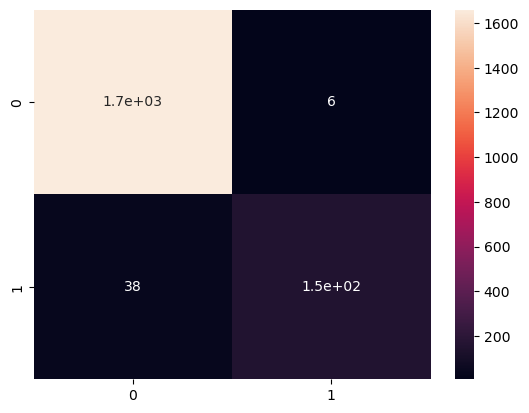

Model name svm_rbf_C100
Test set metrics
Accuracy: 0.9762803234501348
Precision: 0.9503105590062112
Recall: 0.8095238095238095
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.95      0.81      0.87       189

    accuracy                           0.98      1855
   macro avg       0.96      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9843623618225937
Precision: 0.9626485568760611
Recall: 0.8577912254160364
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6757
         1.0       0.96      0.86      0.91       661

    accuracy                           0.98      7418
   macro avg       0.97      0.93      0.95      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


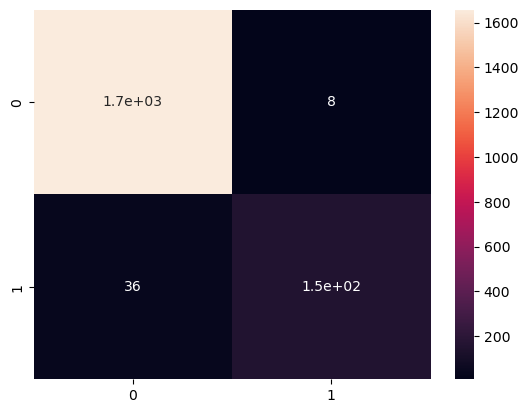

Model name svm_rbf_C1000
Test set metrics
Accuracy: 0.9730458221024259
Precision: 0.9483870967741935
Recall: 0.7777777777777778
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.95      0.78      0.85       189

    accuracy                           0.97      1855
   macro avg       0.96      0.89      0.92      1855
weighted avg       0.97      0.97      0.97      1855

Train set metrics
Accuracy: 0.9866540846589377
Precision: 0.9730639730639731
Recall: 0.8744326777609682
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6757
         1.0       0.97      0.87      0.92       661

    accuracy                           0.99      7418
   macro avg       0.98      0.94      0.96      7418
weighted avg       0.99      0.99      0.99      7418

confusion matrix is


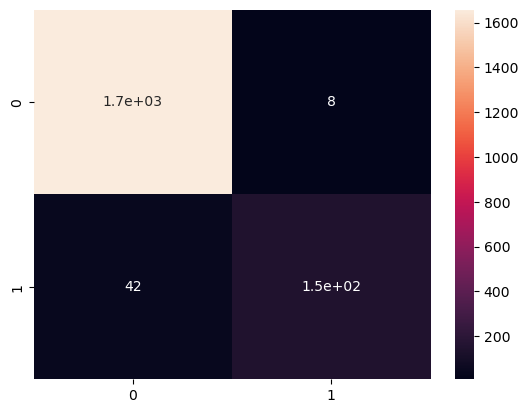

Model name svm_linear_C1
Test set metrics
Accuracy: 0.9762803234501348
Precision: 0.967741935483871
Recall: 0.7936507936507936
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.97      0.79      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9787004583445673
Precision: 0.9435626102292769
Recall: 0.8093797276853253
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.81      0.87       661

    accuracy                           0.98      7418
   macro avg       0.96      0.90      0.93      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


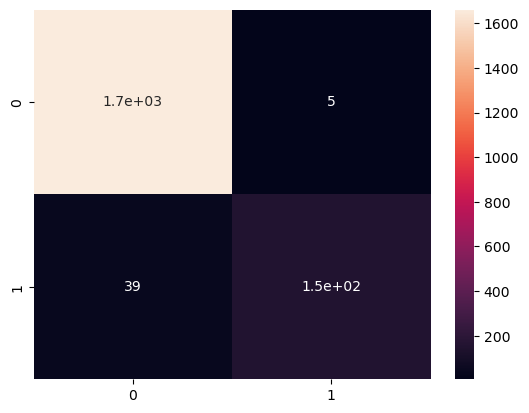

Model name svm_linear_C100
Test set metrics
Accuracy: 0.9773584905660377
Precision: 0.9681528662420382
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.97      0.80      0.88       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9793744944729037
Precision: 0.9425087108013938
Recall: 0.8184568835098336
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.82      0.88       661

    accuracy                           0.98      7418
   macro avg       0.96      0.91      0.93      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


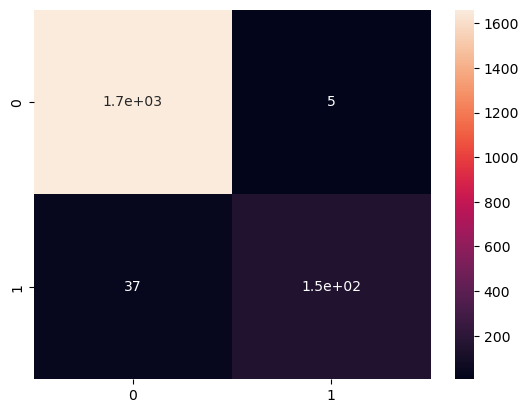

Model name svm_linear_C1000
Test set metrics
Accuracy: 0.9773584905660377
Precision: 0.9681528662420382
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.97      0.80      0.88       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9792396872472364
Precision: 0.9424083769633508
Recall: 0.8169440242057489
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.82      0.88       661

    accuracy                           0.98      7418
   macro avg       0.96      0.91      0.93      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


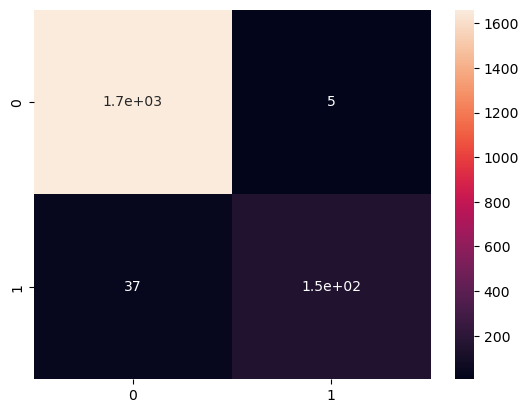

Model name svm_poly_C1
Test set metrics
Accuracy: 0.9752021563342318
Precision: 0.9554140127388535
Recall: 0.7936507936507936
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.96      0.79      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.89      0.93      1855
weighted avg       0.97      0.98      0.97      1855

Train set metrics
Accuracy: 0.9764087355082233
Precision: 0.9434306569343066
Recall: 0.7821482602118003
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.78      0.86       661

    accuracy                           0.98      7418
   macro avg       0.96      0.89      0.92      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


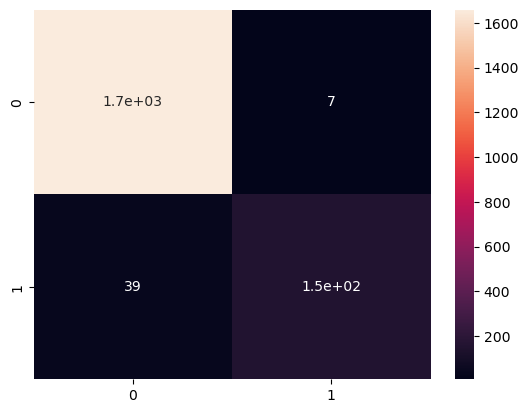

Model name svm_poly_C100
Test set metrics
Accuracy: 0.9762803234501348
Precision: 0.9559748427672956
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.96      0.80      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9804529522782421
Precision: 0.9448275862068966
Recall: 0.8290468986384266
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.83      0.88       661

    accuracy                           0.98      7418
   macro avg       0.96      0.91      0.94      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


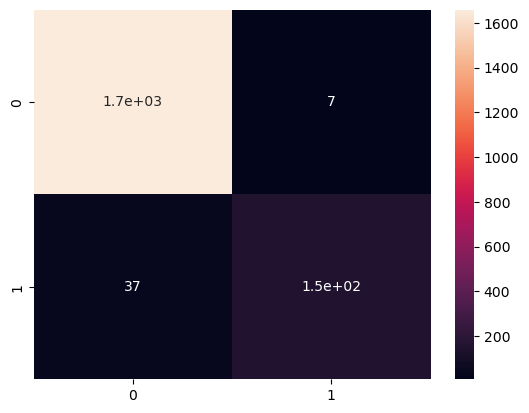

Model name svm_poly_C1000
Test set metrics
Accuracy: 0.9757412398921833
Precision: 0.95
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.95      0.80      0.87       189

    accuracy                           0.98      1855
   macro avg       0.96      0.90      0.93      1855
weighted avg       0.98      0.98      0.97      1855

Train set metrics
Accuracy: 0.9819358317605824
Precision: 0.9566724436741768
Recall: 0.8350983358547656
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.96      0.84      0.89       661

    accuracy                           0.98      7418
   macro avg       0.97      0.92      0.94      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


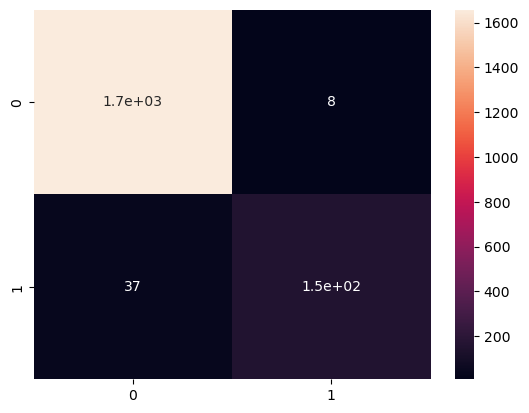

Model name svm_sigmoid_C1
Test set metrics
Accuracy: 0.9752021563342318
Precision: 0.9554140127388535
Recall: 0.7936507936507936
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.96      0.79      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.89      0.93      1855
weighted avg       0.97      0.98      0.97      1855

Train set metrics
Accuracy: 0.9764087355082233
Precision: 0.9434306569343066
Recall: 0.7821482602118003
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.78      0.86       661

    accuracy                           0.98      7418
   macro avg       0.96      0.89      0.92      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


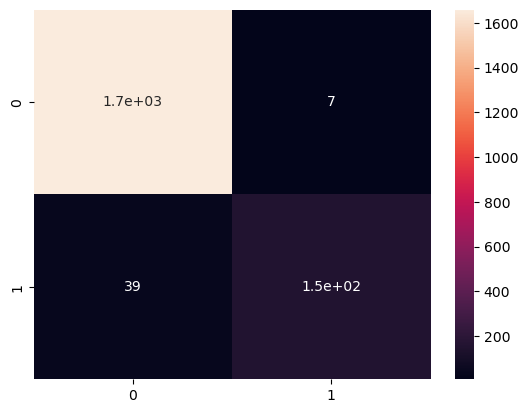

Model name svm_sigmoid_C100
Test set metrics
Accuracy: 0.9762803234501348
Precision: 0.9559748427672956
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.96      0.80      0.87       189

    accuracy                           0.98      1855
   macro avg       0.97      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855

Train set metrics
Accuracy: 0.9804529522782421
Precision: 0.9448275862068966
Recall: 0.8290468986384266
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.94      0.83      0.88       661

    accuracy                           0.98      7418
   macro avg       0.96      0.91      0.94      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


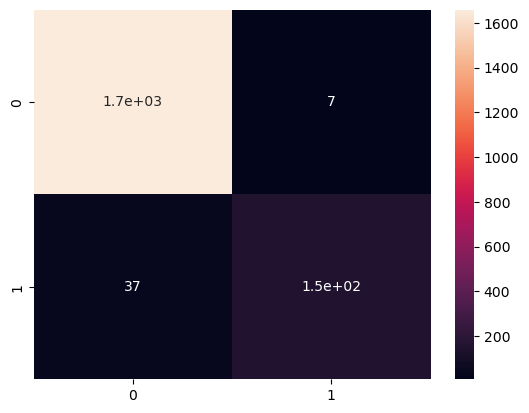

Model name svm_sigmoid_C1000
Test set metrics
Accuracy: 0.9757412398921833
Precision: 0.95
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1666
         1.0       0.95      0.80      0.87       189

    accuracy                           0.98      1855
   macro avg       0.96      0.90      0.93      1855
weighted avg       0.98      0.98      0.97      1855

Train set metrics
Accuracy: 0.9819358317605824
Precision: 0.9566724436741768
Recall: 0.8350983358547656
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6757
         1.0       0.96      0.84      0.89       661

    accuracy                           0.98      7418
   macro avg       0.97      0.92      0.94      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


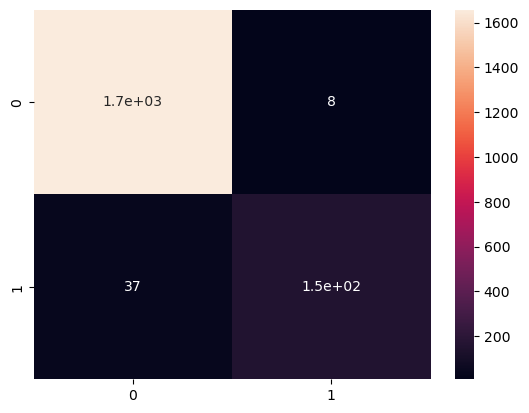

In [59]:
fit_test_svm(models,X_test,X_train,y_test,y_train)

## 17. Plot ROC Curve
## 18. Compute ROC AUC

In [60]:
from sklearn import metrics
def plot_roc_auc(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        fpr,tpr,_ =metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.title('Roc and Auc for Model '+str(model))
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()  

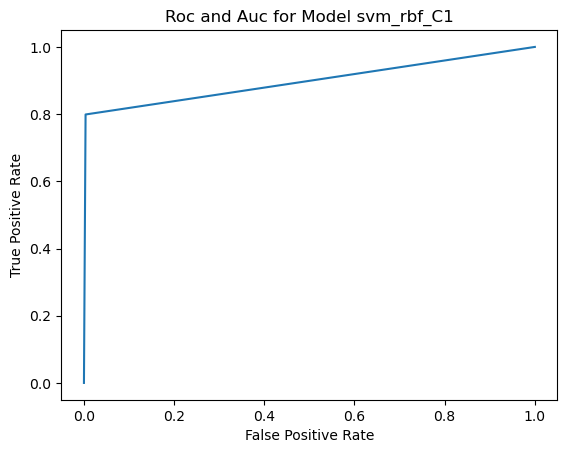

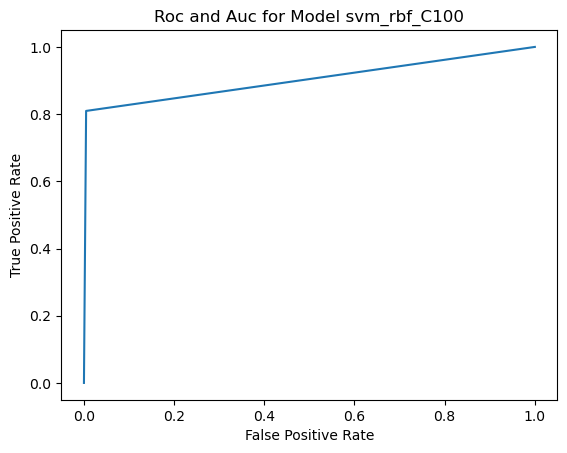

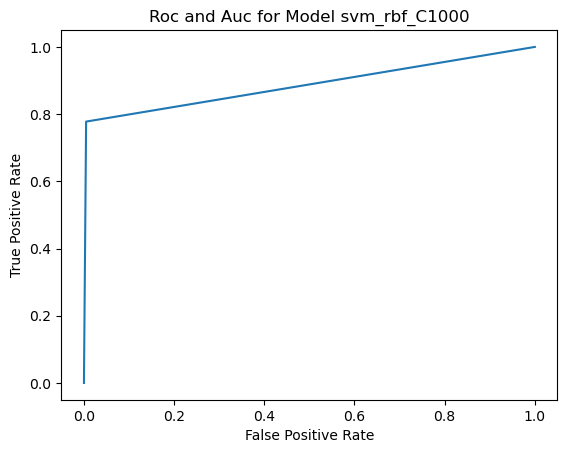

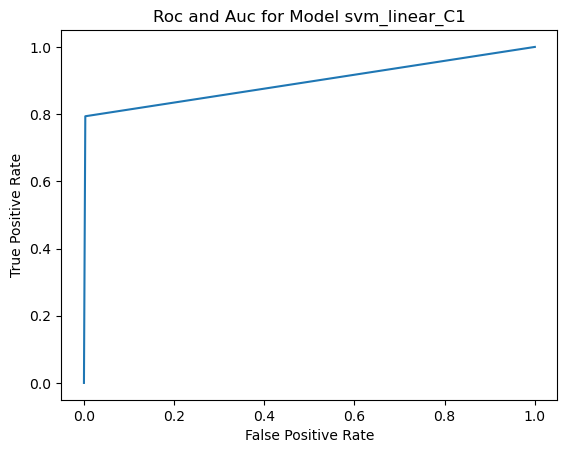

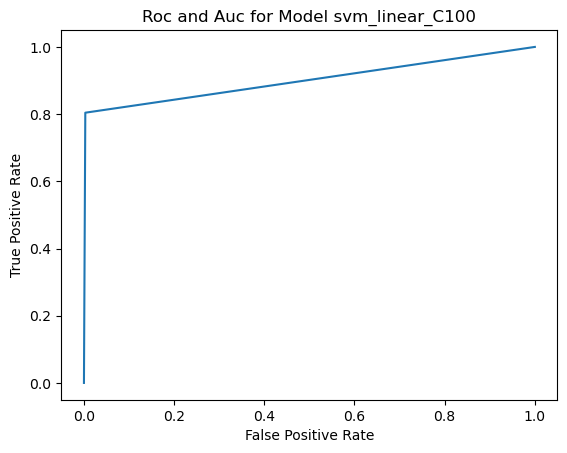

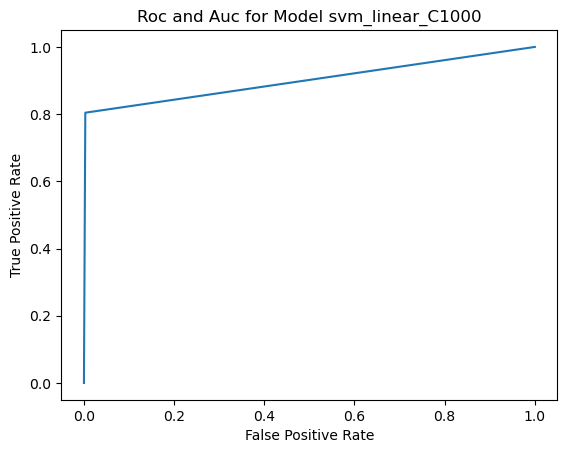

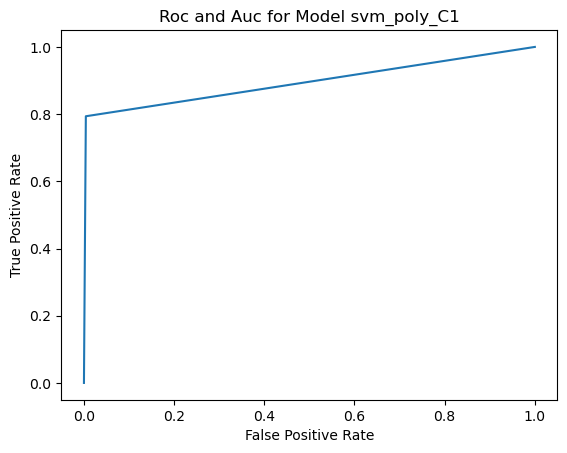

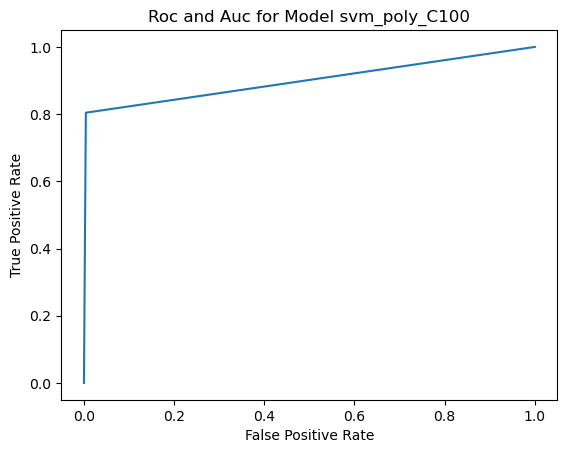

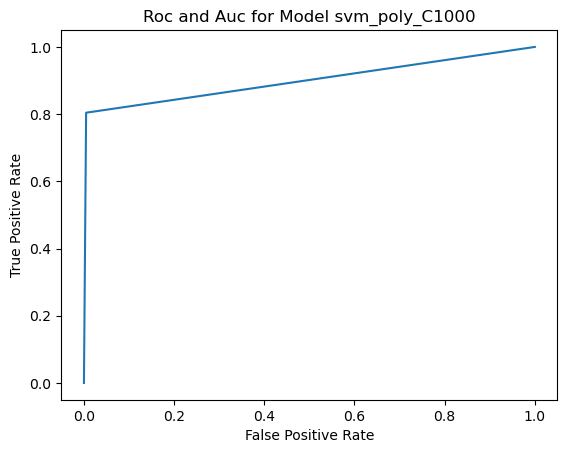

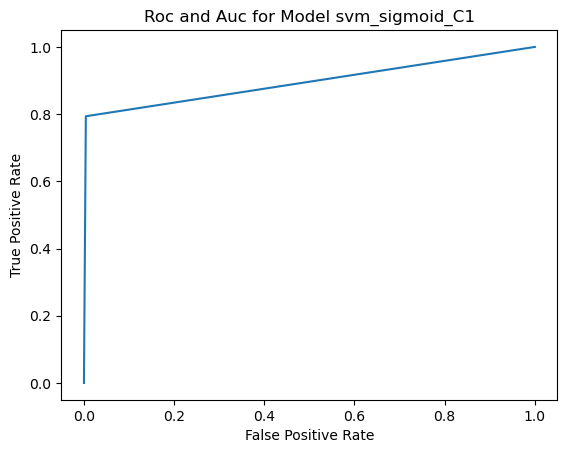

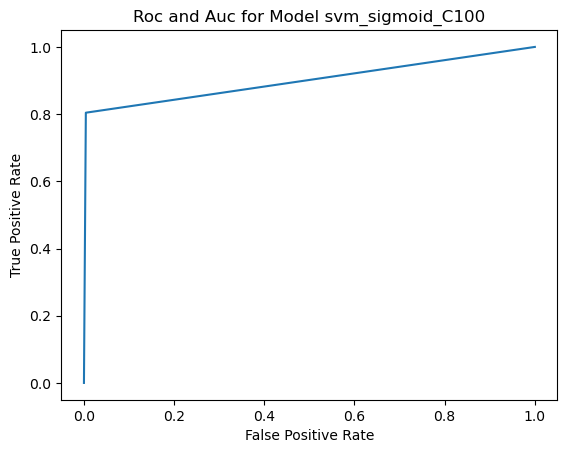

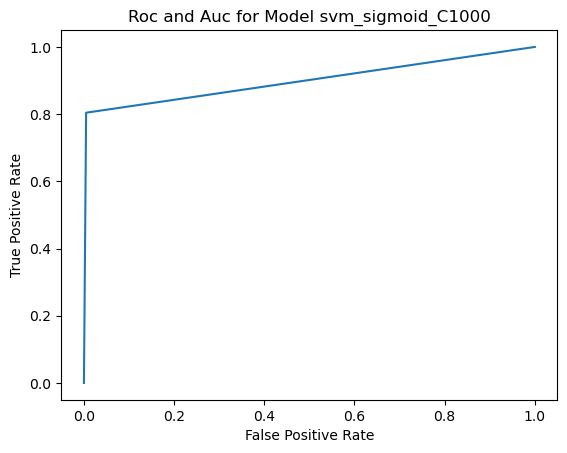

In [61]:
plot_roc_auc(models,X_test,X_train,y_test,y_train)

## 19. Stratified k-fold cross-validation with shuffle split with linear kernel
## 21. Stratified k-fold cross-validation with shuffle split with rbf kernel
## 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel
## 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [62]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC


# Linear kernel with stratified k-fold cross-validation and shuffle split
linear_svc = SVC(kernel='linear')
linear_cv = StratifiedKFold(n_splits=5, shuffle=True)
linear_scores = cross_val_score(linear_svc, X, y, cv=linear_cv)
print("Linear kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", linear_scores.mean())

# RBF kernel with stratified k-fold cross-validation and shuffle split
rbf_svc = SVC(kernel='rbf')
rbf_cv = StratifiedKFold(n_splits=5, shuffle=True)
rbf_scores = cross_val_score(rbf_svc, X, y, cv=rbf_cv)
print("RBF kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", rbf_scores.mean())

# Polynomial kernel with stratified k-fold cross-validation and shuffle split
poly_svc = SVC(kernel='poly')
poly_cv = StratifiedKFold(n_splits=5, shuffle=True)
poly_scores = cross_val_score(poly_svc, X, y, cv=poly_cv)
print("Polynomial kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", poly_scores.mean())

# Sigmoid kernel with stratified k-fold cross-validation and shuffle split
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_cv = StratifiedKFold(n_splits=5, shuffle=True)
sigmoid_scores = cross_val_score(sigmoid_svc, X, y, cv=sigmoid_cv)
print("Sigmoid kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", sigmoid_scores.mean())

Linear kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.978863214089446
RBF kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.9786479877412283
Polynomial kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.9756280148989436
Sigmoid kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.8695141560318334


In [63]:
def stratified_shuffle_split(models, X, y):
    results = {}
    for model_name, model_instance in models.items():
        sss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
        scores = []
        for train_index, test_index in sss.split(X, y):
            X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]#for the indexing to be proper np.array use
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            try:
                model_instance.fit(X_train, y_train)
                pred = model_instance.predict(X_test)
                scores.append(accuracy_score(y_test, pred))
            except Exception as e:
                print(f"Error occurred with model {model_name}: {str(e)}")
                scores.append(None)
        results[model_name] = scores
        print('Shuffle split scores for model:', model_name)
        print(scores)
    return results


In [64]:
results=stratified_shuffle_split(models,X,y)

Shuffle split scores for model: svm_rbf_C1
[0.98274622573688, 0.9795111430625449, 0.9769949676491733, 0.9791516894320632]
Shuffle split scores for model: svm_rbf_C100
[0.9820273184759166, 0.9809489575844716, 0.9784327821711, 0.9784327821711]
Shuffle split scores for model: svm_rbf_C1000
[0.9798705966930266, 0.9802300503235083, 0.9777138749101366, 0.9755571531272466]
Shuffle split scores for model: svm_linear_C1
[0.9834651329978433, 0.9780733285406182, 0.9777138749101366, 0.9787922358015816]
Shuffle split scores for model: svm_linear_C100
[0.9834651329978433, 0.9784327821711, 0.9777138749101366, 0.9795111430625449]
Shuffle split scores for model: svm_linear_C1000
[0.9834651329978433, 0.9780733285406182, 0.9777138749101366, 0.9795111430625449]
Shuffle split scores for model: svm_poly_C1
[0.9805895039539899, 0.9751976994967649, 0.9737598849748382, 0.9755571531272466]
Shuffle split scores for model: svm_poly_C100
[0.9813084112149533, 0.9784327821711, 0.9762760603882099, 0.9795111430625449]